In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# custom helper services 
from data_validation_service import data_validation_service
from data_feature_selection_service import data_feature_selection_service
from data_persistence import save_object, load_object

In [2]:
# load data w labels
data_w_labels = load_object("american_express_data_w_labels")


In [3]:
data_w_labels.head()

,customer_ID,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,...,D_63_nunique,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_nunique,D_68_count,D_68_last,D_68_nunique,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0.933824,0.024194,0.868580,0.960384,0.934745,0.010704,0.024444,0.001082,0.091505,...,1,13,O,1,0,0,13,6.0,1,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0.899820,0.022119,0.861109,0.929122,0.880519,0.215205,0.199150,0.002224,0.567403,...,1,13,O,1,0,0,13,6.0,1,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0.878454,0.028911,0.797670,0.904482,0.880875,0.004181,0.002758,0.000802,0.009704,...,1,13,R,1,0,0,13,6.0,1,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0.598969,0.020108,0.567442,0.623392,0.621776,0.048862,0.088466,0.000660,0.268476,...,1,13,O,1,0,0,13,3.0,3,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0.891679,0.042325,0.805045,0.940382,0.871900,0.004644,0.002882,0.000030,0.008680,...,1,13,O,1,13,1,13,6.0,1,0


### LABEL ENCODE
After label encoding categorical attributes, we will reduce our data dimensionality

In [4]:
cat_features = ["D_63_last", "D_64_last"]
lc = LabelEncoder()

x_train = data_w_labels.drop(['customer_ID'], axis=1)
x_train[cat_features] = x_train[cat_features].apply(lc.fit_transform)

In [5]:
y_train = x_train['target']
x_train = x_train.drop(['target'], axis=1)

In [8]:
# quick sanity check
x_train

,P_2_mean,P_2_std,P_2_min,P_2_max,P_2_last,D_39_mean,D_39_std,D_39_min,D_39_max,D_39_last,...,D_63_last,D_63_nunique,D_64_count,D_64_last,D_64_nunique,D_66_count,D_66_nunique,D_68_count,D_68_last,D_68_nunique
0,0.933824,0.024194,0.868580,0.960384,0.934745,0.010704,0.024444,0.001082,0.091505,0.009119,...,2,1,13,1,1,0,0,13,6.0,1
1,0.899820,0.022119,0.861109,0.929122,0.880519,0.215205,0.199150,0.002224,0.567403,0.178126,...,1,1,13,1,1,0,0,13,6.0,1
2,0.878454,0.028911,0.797670,0.904482,0.880875,0.004181,0.002758,0.000802,0.009704,0.009704,...,1,1,13,2,1,0,0,13,6.0,1
3,0.598969,0.020108,0.567442,0.623392,0.621776,0.048862,0.088466,0.000660,0.268476,0.001083,...,1,1,13,1,1,0,0,13,3.0,3
4,0.891679,0.042325,0.805045,0.940382,0.871900,0.004644,0.002882,0.000030,0.008680,0.005573,...,1,1,13,1,1,13,1,13,6.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
458908,0.848750,0.041969,0.730505,0.895553,0.844229,0.119236,0.195278,0.002237,0.589866,0.447585,...,1,1,13,3,1,13,1,13,6.0,1
458909,0.859327,0.012425,0.831279,0.868121,0.831279,0.066421,0.123937,0.007327,0.478106,0.033670,...,1,1,13,2,1,0,0,13,6.0,1
458910,0.786838,0.014312,0.756983,0.802953,0.800522,0.221548,0.182743,0.000223,0.536278,0.267018,...,1,1,13,3,1,0,0,13,5.0,1
458911,0.804454,0.037442,0.754129,0.856981,0.754129,0.030878,0.081779,0.001332,0.300991,0.008619,...,1,1,13,3,2,0,0,13,3.0,2


In [9]:
y_train

0         0
1         0
2         0
3         0
4         0
         ..
458908    0
458909    0
458910    0
458911    1
458912    0
Name: target, Length: 410470, dtype: int64

### FEATURE SELECTION
With a ton of features, we want to prune these down to reduce overfitting + training time.

In [76]:
fs_svc = data_feature_selection_service(x_train, y_train)

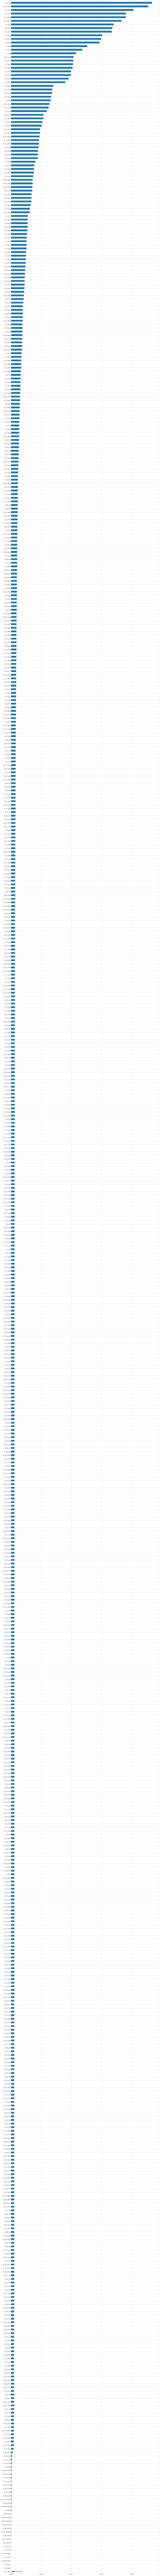

In [77]:
fs_svc.get_random_forest_feature_importance()

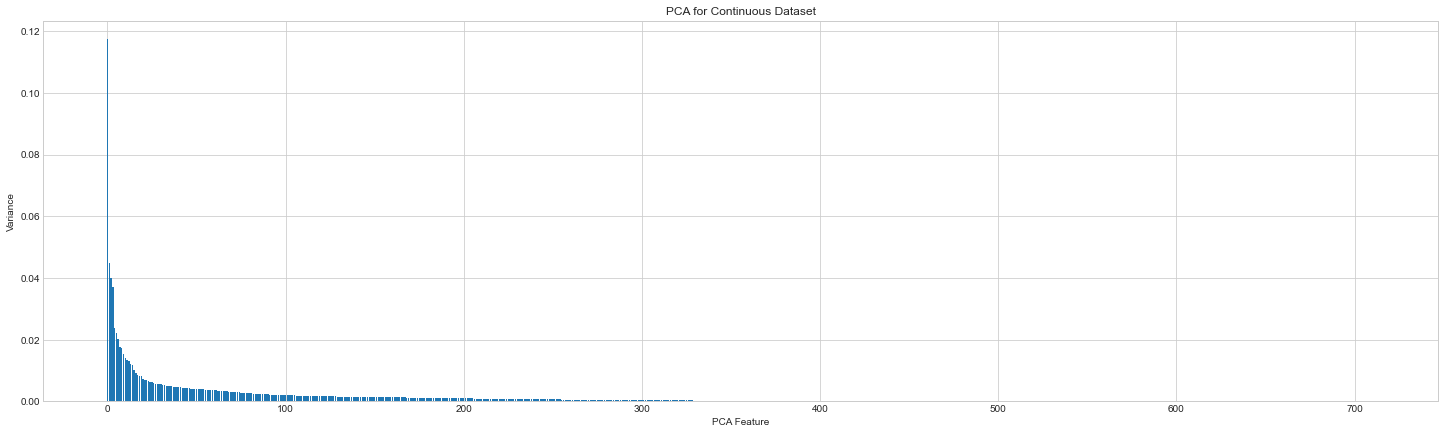

In [78]:
fs_svc.get_PCA_variance_importance()

In [80]:
_60_attr = fs_svc.get_most_important_n_columns_from_rf_importance(60)
_x_train_60 = x_train[_60_attr]

C:\Users\jw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\jw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Feature Ranking For Non-Discretised: [ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  5  3
  1  1  7  1  1  9  1  1  1  1  4  1  1  1  1  1  1  1  1  1  6  1  1  2
  8  1  1  1  1 10  1  1  1  1  1  1]
Optimal number of features : 51


C:\Users\jw\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


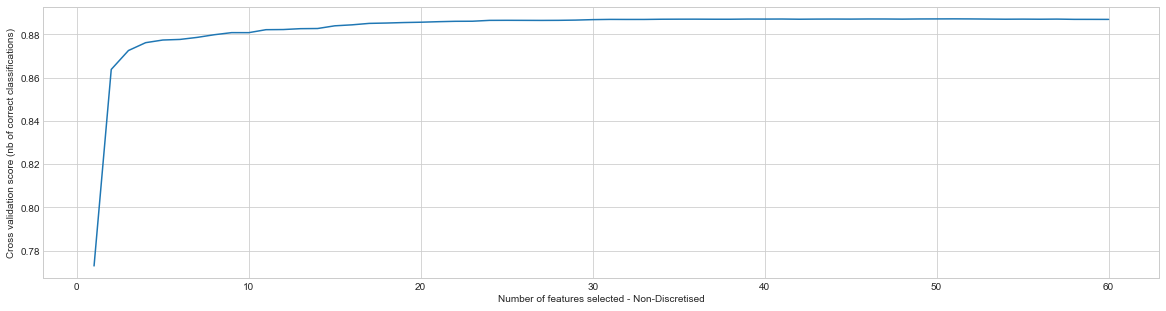

In [82]:
_recursive_ft_elimination_svc = data_feature_selection_service(_x_train_60, y_train)
_recursive_ft_elimination_svc.get_recursive_feature_elimination()

In [85]:
#take the first 51 features for model training and evaluation
_51_attr = fs_svc.get_most_important_n_columns_from_rf_importance(51)
save_object(_51_attr, 'american_express_training_attributes')

In [91]:
_51_attr.append('target')


['B_3_last', 'D_44_mean', 'P_2_max', 'P_2_min', 'R_1_mean', 'B_9_mean', 'P_2_last', 'D_44_last', 'R_1_max', 'B_2_last', 'P_2_mean', 'B_9_last', 'B_1_last', 'B_11_last', 'R_1_std', 'D_44_max', 'B_3_max', 'R_1_last', 'B_18_last', 'B_37_last', 'B_9_max', 'B_33_last', 'B_6_last', 'D_55_last', 'B_18_min', 'D_61_last', 'B_40_last', 'B_3_std', 'S_25_mean', 'D_61_max', 'B_6_min', 'B_20_max', 'B_7_mean', 'B_7_last', 'D_75_last', 'B_22_mean', 'D_75_max', 'B_33_mean', 'B_2_mean', 'R_10_mean', 'R_10_std', 'B_20_last', 'B_23_last', 'R_2_last', 'P_3_last', 'S_25_std', 'B_19_last', 'R_6_max', 'R_7_std', 'B_20_mean', 'B_37_mean', 'target']


In [96]:
save_object(data_w_labels[_51_attr], "ae_training_data")